# SVM

## What is SVM

<img src="./svm.jpg" />

[Definition](https://en.wikipedia.org/wiki/Support-vector_machine#Definition): More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

With above graph, direct representation of what SVM is tring to do:

$$
\begin{align*}
  &arg \underset{boundary}{max} margin(boundary), \\
  &s.t. \text{the gap between the final boundary and all the correctly classified apples/bananas >= margin} \\
  &\text{(when given a boundary, the margin function calculates the minimal gap between that boundary and all the apples/bananas)}
\end{align*}
$$

## Functional margin vs geometric margin, and SVM interpretation

Lets say we had the final hyperplane: $w^Tx + b = 0$, then we can use $|w^Tx_i + b|$ to represent how far the data point $x_i$ is from the hyperplane, and also to the binary classification problems: we can define that when $(w^Tx_i + b) > 0$ then $x_i \in class 1$, and when $(w^Tx_i + b) < 0$ then $x_i \in class -1$;

With $y \in \{-1, 1\}$, to those correctly classified data points we will always have $y(w^Tx + b) > 0$, and the bigger the value is the more confident we are that the data point is correctly classified;

$\hat{\gamma_i} = y_i(w^Tx_i + b)$ is so called **functional margin** between the data point $(x_i, y_i)$ and the hyperplane $w^Tx + b = 0$;

But there is one problem with this functional margin, when we proportionally scale up/down the $w, b$ to $Mw, Mb$, the hyperplane never got changed, but the original functional margin $\hat{\gamma_i}$ will be changed to $M\hat{\gamma_i}$;

To standardize the margin, there is **geometric margin**:

$$
\gamma_i = y_i \frac{w^Tx_i + b}{||w||}
$$

So another representation of what SVM is trying to achieve:

$$
\begin{align*} \tag{1}
  &arg \, \underset{w, b}{max} \, \gamma \\
  &s.t. \, y_i \frac{w^Tx_i + b}{||w||} \geq \gamma, \forall i
\end{align*}
$$

As the connection between the functional margin $\hat{\gamma_i}$ and the geometric margin $\gamma_i$:

$$\gamma_i = \frac{\hat{\gamma_i}}{||w||}$$

the above representation **(1)** also can be interpreted to:

$$
\begin{align*} \tag{2}
  &arg \, \underset{w, b}{max} \, \frac{\hat{\gamma}}{||w||} \\
  &s.t. \, y_i(w^Tx_i + b) \geq \hat{\gamma}, \forall i
\end{align*}
$$

As we told above that we can always proportionally scale up/down the $w, b$ without affecting the actual hyperplane we are looking for, so for simplifying the problem: we can tweak the $w, b$ to make the functional margin be 1, then further more we can convert the representation to:

$$
\begin{align*} \tag{3}
  &arg \, \underset{w, b}{max} \, \frac{1}{||w||} \\
  &s.t. \, y_i(w^Tx_i + b) \geq 1, \forall i
\end{align*}
$$

In ML we are always accustomed to solve the minimization problem, not the maximization problem, so lets further more convert the above **(3)**:

$$
\begin{align*} \tag{4}
  &arg \, \underset{w, b}{min} \, \frac{1}{2}||w||^2 \\
  &s.t. \, y_i(w^Tx_i + b) \geq 1, \forall i
\end{align*}
$$

This is the final interpretation of what SVM is trying to achieve.

## Lagrange multiplier, Lagrange duality and KKT conditions

### Lagrange equation

With above form **(4)**, lets construct the Lagrange equation:

$$
\begin{equation} \tag{5}
  L(w, b, \alpha)=\frac{1}{2}\|w\|^2 - \sum_{i=1}^n \alpha_{i}\big(y_i(w^T \cdot x_i + b) - 1\big)
\end{equation}
$$

The methodology behind the way constructing the Lagrange equation please refer to this image [lagrange duality](https://github.com/lnshi/ml-exercises/blob/master/ml_basics/rdm011_support_vector_machines/lagrange_duality.png), it is a long image, i don't want to put here, especially pay attention to the red box highlighted part.

###  Primal problem:

$$
\begin{equation} \tag{5.1}
  \min _{w, b} \, \big[ \max _{\alpha : \alpha_{i} \geq 0} L(w, b, \alpha) \big]
\end{equation}
$$

### Dual problem:

$$
\begin{equation} \tag{5.2}
  \max _{\alpha : \alpha_{i} \geq 0} \, \big[ \min _{w, b} L(w, b, \alpha) \big]
\end{equation}
$$

The reason why we need to introduce in the dual problem, and solve the dual problem instead of the primal problem, and a full example of solving a real problem can be found in this image [lagrange duality example](https://github.com/lnshi/ml-exercises/blob/master/ml_basics/rdm011_support_vector_machines/lagrange_duality_example.png), again it is a long image, i don't want to put here, especially pay attention to the red box highlighted part.

In short words: in the primal problem, after we treat $w, b$ as a fixed value, then $L(w, b, \alpha)$ is a **LINEAR FUNCTION** with independent variables $x_i$, we **CANNOT** get its maxima/minima by taking advantages of those derivative/partial derivative knowledges, the only left way is brute force compare, definitely that is NOT what we want. But in the dual problem, we can.

### How to solve the dual problem

$$
\begin{align*}
  &\frac{\partial L}{\partial w}=0 \Longrightarrow w=\sum_{i=1}^n \alpha_i y_i x_i \tag{5.3} \\
  &\frac{\partial L}{\partial b}=0 \Longrightarrow 0=\sum_{i=1}^n \alpha_i y_i \tag{5.4}
\end{align*}
$$

Combine (5.3) with (5) we can get:

$$
\begin{align*} \tag{5.5}
  L(w, b, \alpha) &= \frac{1}{2}\|w\|^{2}-\sum_{i=1}^n \alpha_{i}\big(y_{i}(w^{T} \cdot x_{i}+b)-1\big) \\
  &= \frac{1}{2} w^T w - w^T \sum_{i=1}^n \alpha_i y_i x_i - b\sum_{i=1}^n \alpha_i y_i + \sum_{i=1}^n \alpha_i \\
  &= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum_{i=1}^n \alpha_i \\
  &= \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
\end{align*}
$$

Finally the dual problem is converted to:

$$
\begin{align*} \tag{5.6}
  &\max _{\alpha} \Bigg[ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \Bigg] \\
  &s.t. \sum_{i=1}^n \alpha_{i} y_{i} = 0 \\
  &\quad \,\,\, \alpha_i \geq 0, \forall i
\end{align*}
$$

Of course, again you can covert it to a minimization problem:

$$
\begin{align*} \tag{5.7}
  &\min _{\alpha} \Bigg[\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^n \alpha_i \Bigg] \\
  &s.t. \sum_{i=1}^n \alpha_{i} y_{i} = 0 \\
  &\quad \,\,\, \alpha_i \geq 0, \forall i
\end{align*}
$$

### KKT conditions

Take the below optimization problem as example:

$$
\begin{align*}
  &min f(x) \\
  &s.t. g_{j}(x) = 0 \, (j=1,2, \cdots, p) \\
  &\quad \,\, h_{k}(x) \leq 0 \, (k=1,2, \cdots, q)
\end{align*}
$$

Construct Lagrange equation:

$$
\begin{align*}
  L(x, \alpha, \beta) = f(x) + \sum_{j=1}^p \alpha_j g_j(x) + \sum_{k=1}^q \beta_k h_k(x)
\end{align*}
$$

KKT conditions are the necessary conditions to make $x^*$ be the optimal solution of the original optimization problem after we did all of the transformations:
1. Lagrange equation construction;
2. Primal problem construction;
3. Dual problem construction;

$$
\begin{cases}
  \frac{\partial f}{\partial x_i} + \sum\limits_{j=1}^p \alpha_j \frac{\partial g_j}{\partial x_i} + \sum\limits_{k=1}^q \beta_k \frac{\partial h_k}{\partial x_i} = 0 &\quad (i = 1, 2, \cdots, m) \\
  g_{j}(x) = 0 &\quad (j=1,2, \cdots, p) \\
  \beta_k h_{k}(x) = 0 &\quad (k=1,2, \cdots, q) \\
  \beta_k \geq 0
\end{cases}
$$

## Coordinate ascent algorithm and SMO

### Coordinate ascent algorithm

Very simple algorithm, there is an example here [coordinate ascent example](https://github.com/lnshi/ml-exercises/blob/master/ml_basics/rdm011_support_vector_machines/coordinate_ascent_example.png) to demonstrate how it works.

### SMO

For readabilities, i copy above our final dual problem (5.7) here:

$$
\begin{align*} \tag{5.7 copy}
  &\min _{\alpha} \Bigg[\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^n \alpha_i \Bigg] \\
  &s.t. \sum_{i=1}^n \alpha_{i} y_{i} = 0 \\
  &\quad \,\,\, \alpha_i \geq 0, \forall i
\end{align*}
$$

In coordinate ascent algorithm, after has done the random initialization(CANNOT initialize with 0), in each iteration we choose only one variable to update.

But with above problem, there is constraint $\sum\limits_{i=1}^n \alpha_{i} y_{i} = 0$, so we CANNOT just update one variable at a time, but at least update another one correspondingly to satisfy the constraint, so instead of one we choose two variables to tune in one iteration in SMO.

Detailed steps to show how to update the randomly chosen(actually there is some strategies to decide which better to chose) two variables $(\alpha_i, \alpha_j)$ in each iteration can be referred here: [SMO example](https://github.com/lnshi/ml-exercises/blob/master/ml_basics/rdm011_support_vector_machines/smo.png), full article from here: [机器学习算法实践-SVM中的SMO算法](https://zhuanlan.zhihu.com/p/29212107).

# Experience sklearn built-in SVM

In [46]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sets the backend of matplotlib to the 'inline' backend.
#
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
# directly below the code cell that produced it.
# The resulting plots will then also be stored in the notebook document.
#
# More details: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

from scipy.io import loadmat

raw_data = loadmat(os.getcwd() + '/linear_discriminable_samples.mat')

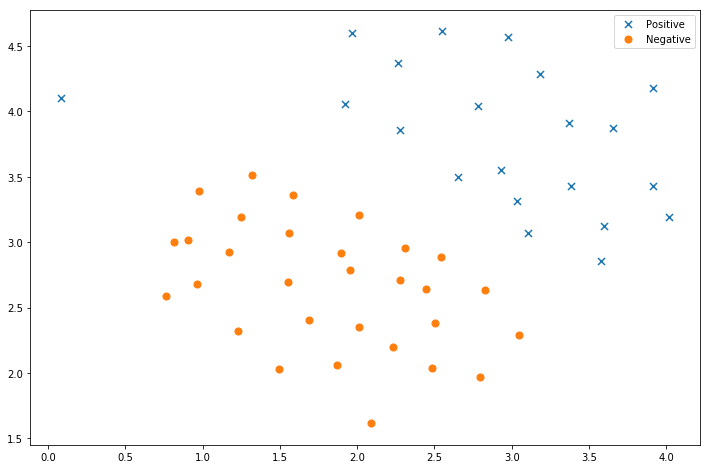

In [47]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend() 

## SVM with linear kernel ('C=1' vs 'C=100')

In [48]:
from sklearn import svm

svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc1

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [49]:
svc1.fit(data[['X1', 'X2']], data['y'])  
svc1.score(data[['X1', 'X2']], data['y'])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [50]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
svc2.fit(data[['X1', 'X2']], data['y'])  
svc2.score(data[['X1', 'X2']], data['y']) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

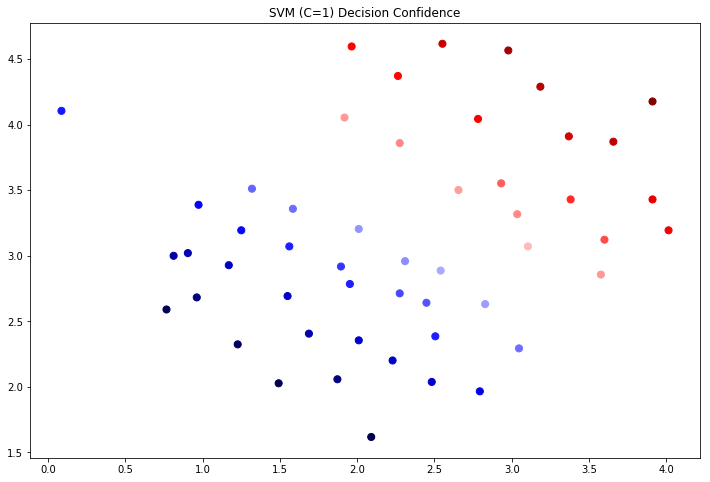

In [51]:
data['SVM 1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

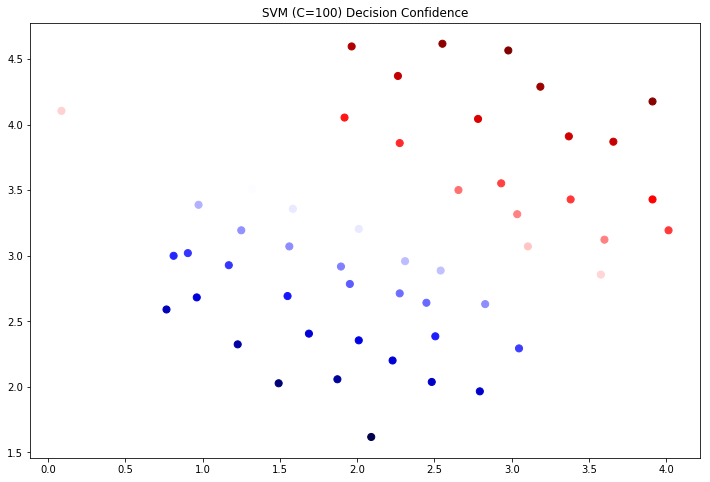

In [52]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=100) Decision Confidence')

## SVM with gaussian kernel (built-in by sklearn already)

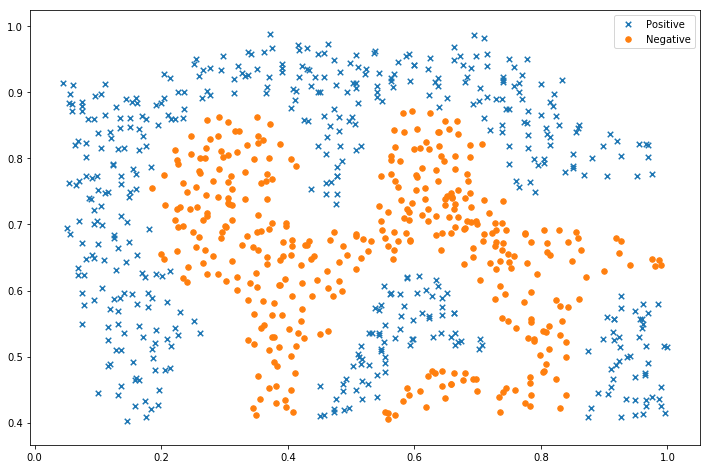

In [53]:
raw_data = loadmat(os.getcwd() + '/nonlinear_discriminable_samples.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()

### How to use a custom kernel with some dynamic values

In [54]:
def build_gaussian_kernel(sigma):
    def gaussian_kernel(x1, x2):
        return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
    return gaussian_kernel
# Then: svc = svm.SVC(C=100, kernel=build_gaussian_kernel(sigma=1), gamma=10, probability=True)

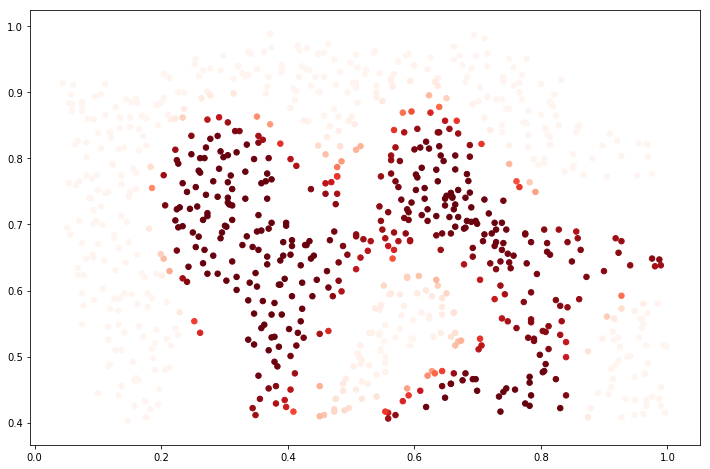

In [55]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

### Model selection: 'GridSearchCV' and 'PredefinedSplit'

In [56]:
from sklearn import base
from sklearn import model_selection
from sklearn import ensemble

raw_data = loadmat(os.getcwd() + '/samples_contain_both_training_and_validation_set.mat')

X = np.concatenate(
    (raw_data['X'], raw_data['Xval']), axis=0
)
y = np.concatenate(
    (raw_data['y'].ravel(), raw_data['yval'].ravel())
)

test_fold = np.concatenate(
    (
        np.full(raw_data['X'].shape[0], 0),
        np.full(raw_data['Xval'].shape[0], -1)
    )
)
ps = model_selection.PredefinedSplit(test_fold)

param_candidates = [
    {
        'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
        'kernel': ['rbf']
    }
]

gs = model_selection.GridSearchCV(
    estimator=svm.SVC(),
    param_grid=param_candidates,
    cv=ps,
    refit=True,
    error_score=0,
    n_jobs=-1
)

gs.fit(X, y)
gs.best_estimator_, gs.best_score_

(SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), 0.943127962085308)

# References

- [支持向量机(SVM)是什么意思？](https://www.zhihu.com/question/21094489/answer/117246987)

- [支持向量机中的函数距离和几何距离怎么理解？](https://www.zhihu.com/question/20466147/answer/28469993)

- [SVM推导过程](https://zhuanlan.zhihu.com/p/34811858)

- [学习SVM（三）理解SVM中的对偶问题](https://blog.csdn.net/chaipp0607/article/details/73849539)

- [零基础学SVM—Support Vector Machine(一)](https://zhuanlan.zhihu.com/p/24638007)

- [零基础学SVM-Support Vector Machine(二)](https://zhuanlan.zhihu.com/p/29865057)

- [简易解说拉格朗日对偶（Lagrange duality）](http://www.cnblogs.com/90zeng/p/Lagrange_duality.html)

- [浅谈最优化问题的KKT条件](https://zhuanlan.zhihu.com/p/26514613)

- [机器学习算法实践-SVM中的SMO算法](https://zhuanlan.zhihu.com/p/29212107)